<a href="https://colab.research.google.com/github/parkjiye/TNT_WinterSession/blob/main/%EB%A6%BF%EC%A7%80%26%EB%9D%BC%EC%8F%98%26%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 8.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=862a4a6aa772459edec2d6b7a99c3ee3c18b0b46f8b9f6c8eefa9c3ed87cdbd2
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# **데이터 셋 불러오기 - Boston 주택가격 데이터셋**

In [ ]:
import mglearn

from sklearn.datasets import load_boston
boston=load_boston()

In [ ]:
#데이터셋을 만듭니다
X,y=mglearn.datasets.load_extended_boston()

print("Xshape:{}".format(X.shape))

Xshape:(506, 104)


506개의 샘플과 104개의 특성

# **01. 선형회귀 모델로 성능 확인하기**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# 기울기 파라미터(w)는 가중치/계수라고 하며 coef_속성에 저장되어있다.
# 파라미터b는 편향/절편 값은 intercept_속성에 저장되어있다.

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

print("훈련 세트의 정확도 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264e+0

# **02. Ridge 회귀를 이용한 성능 확인하기**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.87
테스트 세트의 정확도 : 0.81


LinearRegression에 비해 훈련 세트에서는 점수가 낮지만  테스트 세트에 대한 점수는 더 높다!

**위 결과에서 선형 회귀는 이 데이터 셋에서 과대적합되지만 Ridge는 덜 자유로운 모델이기에 과대적합이 적어진다.**

모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다. 현재 우리가 눈여겨 보고 있는 것은 훈련 세트가 아닌 테스트 세트이므로 Ridge 모델을 선택해야 한다.

# **03. alpha값에 따른 일반화 확인하기**

Ridge는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공한다.

alpha값을 바꿔보면서 확인해보자.

alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다!(기본값 alpha=1.0)

alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트의 정확도 : 0.77
테스트 세트의 정확도 : 0.73


반대로 alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.

In [27]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트의 정확도 : 0.92
테스트 세트의 정확도 : 0.82


위 데이터셋의 경우에는 alpha=0.1일때 정확도가 더 높다.

# **04. alpha값에 따른 coef_ 속성의 변화 확인하기**

alpha값에 따른 coef 속성(w)의 변화를 그래프로 확인해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.

**alpha값이 높으면 제약이 많으므로 작은 값일 때보다 절대값의 크기가 작을 것이다.**(일반화가 쉬워지기 때문에)

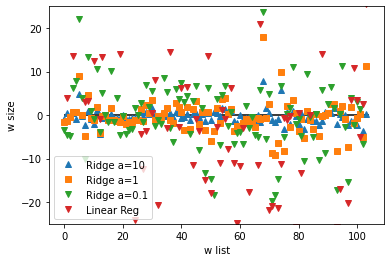

In [28]:
import matplotlib.pyplot as plt

plt.plot(ridge10.coef_,'^',label="Ridge a=10")
plt.plot(ridge.coef_,'s',label="Ridge a=1")
plt.plot(ridge01.coef_,'v',label="Ridge a=0.1")

plt.plot(lr.coef_,'v',label="Linear Reg")
plt.xlabel("w list")
plt.ylabel("w size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

plt.show()

alpha 값이 커질수록 0에 가까워짐을 확인할 수 있다!

# **05. Lasso 회귀를 이용한 성능 확인하기**

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.29
테스트 세트의 정확도 : 0.21
사용한 특성의 수 : 4
사용한 max_iter : 34


Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않은데, 과소적합으로 104개의 특성 중 4개만 사용한 것을 확인할 수 있다.

# **06. alpha값에 따른 라쏘 회귀 성능 확인하기**

Ridge와 마찬가지로 Lasso도 계수를 얼마나 강하게 0으로 보낼지 조절하는 alpha 매개변수를 지원한다.

과소적합을 줄이기 위해서 alpha값을 줄여보자.
이렇게 하려면 max_iter 기본값을 늘려야 한다. (증가시키지 않으면 늘리라는 경고가 나온다.)


In [30]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso001.n_iter_))

훈련 세트의 정확도 : 0.90
테스트 세트의 정확도 : 0.77
사용한 특성의 수 : 33
사용한 max_iter : 1886


In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso00001.n_iter_))

훈련 세트의 정확도 : 0.95
테스트 세트의 정확도 : 0.64
사용한 특성의 수 : 96
사용한 max_iter : 41420


alpha값을 작게 할 수록 사용한 특성의 수를 보면 4->33->94개로 증가한것을 보면 된다.

**alpha값을 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.**

# **07. 엘라스틱넷을 이용한 성능 확인하기**

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(elastic_net.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(elastic_net.score(X_test, y_test)))

훈련 세트의 정확도 : 0.72
테스트 세트의 정확도 : 0.55
